<a href="https://colab.research.google.com/github/riyagpt0251/AIDiabetesTest/blob/main/AIDiabetesTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

load the dataset

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

data preprocesssing

In [4]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']


handle missing value

In [5]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col].replace(0, np.nan, inplace=True)

<ipython-input-5-b7b7feda1069>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)


fill missing value

In [7]:
df.fillna(df.mean(), inplace=True)

split dataset into train set and testset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature scaling

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


train the model

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

make preiction

In [11]:
y_pred = model.predict(X_test)

evalute the model

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


In [13]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



confusion matrix

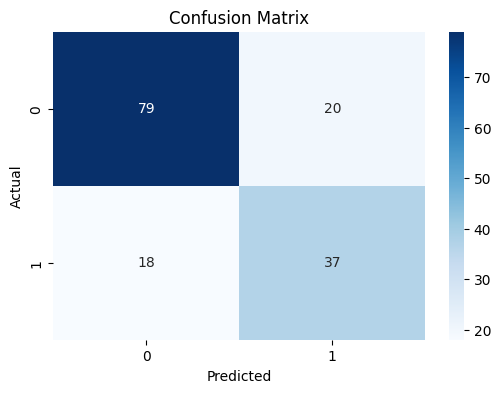

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

function for predict new case

In [15]:
def predict_diabetes(input_data):
    input_data = np.array(input_data).reshape(1, -1)
    input_data = scaler.transform(input_data)  # Apply the same scaling
    prediction = model.predict(input_data)
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

# Example Usage:
new_patient = [2, 120, 70, 23, 120, 28.5, 0.45, 25]  # Modify values accordingly
print("\nNew Patient Prediction:", predict_diabetes(new_patient))


New Patient Prediction: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
